# Logistic Regression with the Titanic Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Exploratory Data Analysis

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

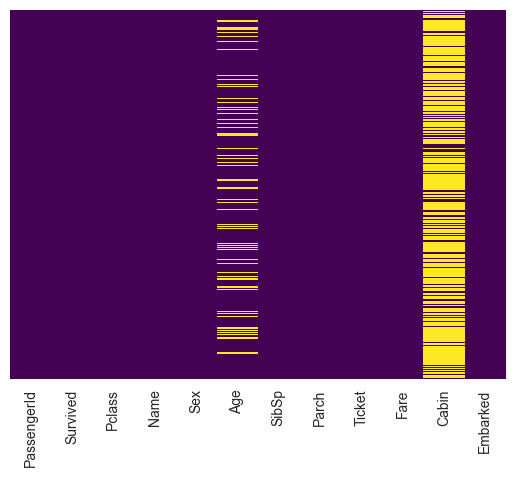

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

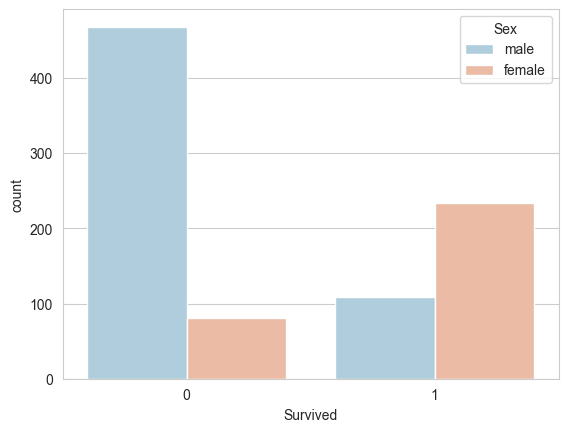

In [7]:
# We can see that there are a lot of missing values in the age column

sns.set_style('whitegrid')

# Survival rate based on Sex
sns.countplot(x='Survived',data=train,palette='RdBu_r', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

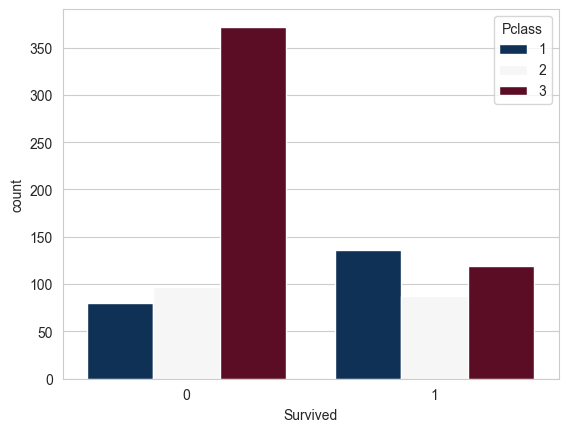

In [8]:
# Now we will check the survival rate based on the passenger class
sns.countplot(x='Survived',data=train,palette='RdBu_r', hue='Pclass')

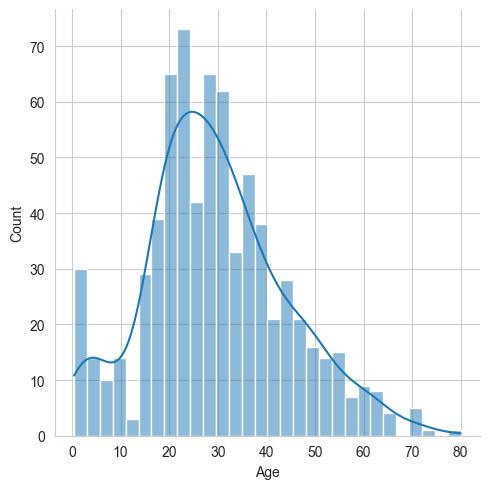

In [9]:
# Let's check the age distribution of the passengers
sns.displot(train['Age'].dropna(),kde=True,bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

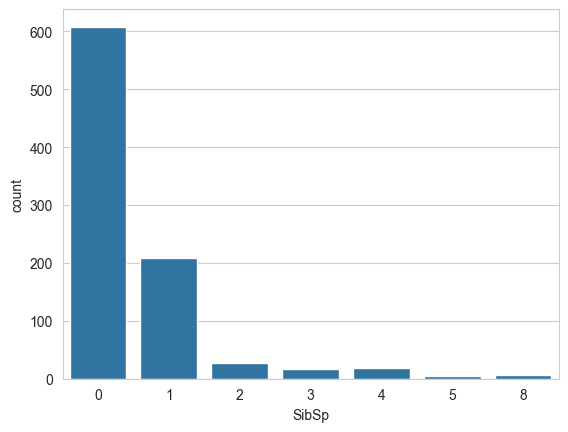

In [10]:
# Let's check the number of siblings/spouses on board
sns.countplot(x='SibSp',data=train)

<Axes: >

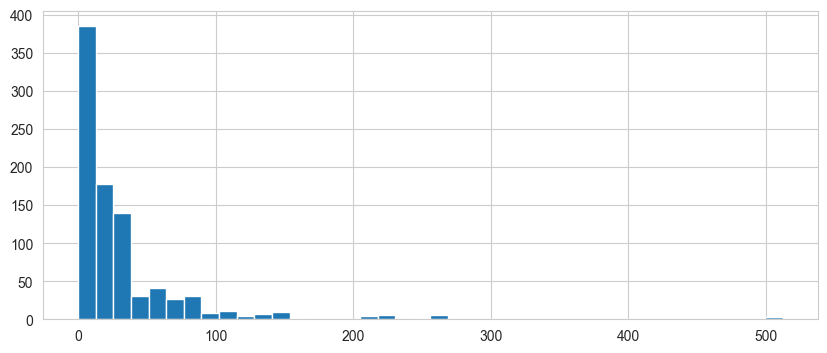

In [11]:
# Let's check the fare distribution
train['Fare'].hist(bins=40,figsize=(10,4))

## 2. Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

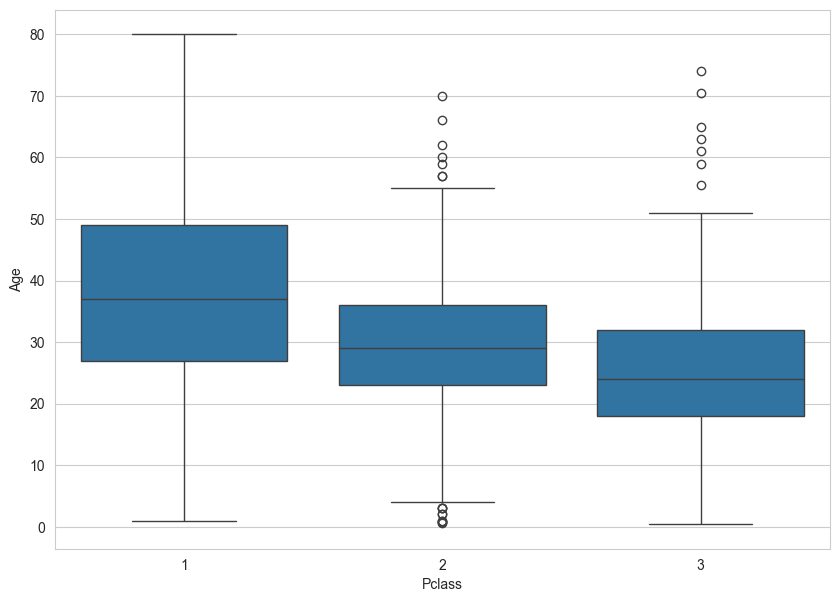

In [14]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [21]:
def impute_age(cols):
    age = cols.iloc[0]
    p_class = cols.iloc[1]
    
    if pd.isnull(age):
        
        if p_class == 1:
            #calculate the mean age of passengers in class 1 with pandas an return it
            return round(train[train['Pclass']==1]['Age'].mean())
        
        elif p_class == 2:
            return round(train[train['Pclass']==2]['Age'].mean())
        
        else:
            return round(train[train['Pclass']==1]['Age'].mean())
        
    else:
        return age

In [22]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

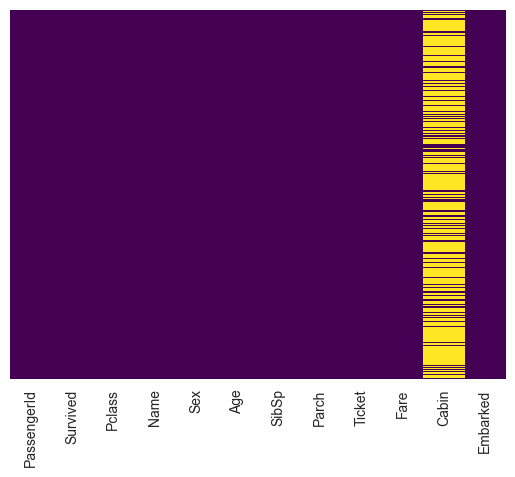

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [24]:
train.drop('Cabin',axis=1,inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

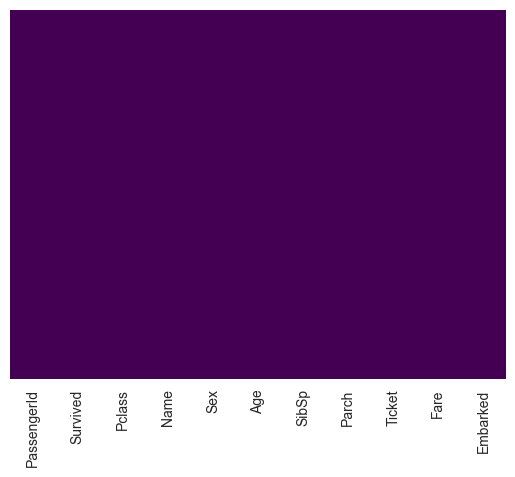

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 2.2 Converting Categorical Features

In [27]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
train.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [28]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


### 2.3 Train Test Split

In [29]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 3. Training and Predicting

In [32]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [35]:
# Predictions
predictions = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.66      0.72       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268


In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,predictions)

array([[136,  18],
       [ 39,  75]])